In [1]:
#Pawar Pallavi Sunil
#PRN:-UIT22F1098
#Roll No:-106

In [2]:
import pandas as pd
bank_data = pd.read_csv("6.csv")
print(bank_data.head())

  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1  33;"services";"married";"secondary";"no";4789;...                                                                                                  
2  35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3  30;"management";"married";"tertiary";"no";1476...                                                                                                  
4  59;"blue-collar";"married";"secondary";"no";0;...                                                                                                  


In [3]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [4]:
print(bank_data.columns)


Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')


In [5]:
bank_data.columns = bank_data.columns.str.strip()

In [6]:
print([col for col in bank_data.columns if 'default' in col.lower()])

['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"']


In [7]:
print(bank_data.head())

  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1  33;"services";"married";"secondary";"no";4789;...                                                                                                  
2  35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3  30;"management";"married";"tertiary";"no";1476...                                                                                                  
4  59;"blue-collar";"married";"secondary";"no";0;...                                                                                                  


In [8]:
bank_data = pd.read_csv("6.csv", delimiter=';')
print(bank_data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [9]:
# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply label encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Use the same encoding for test data
    label_encoders[col] = le  # Save encoders for later use

In [11]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_pred = rf.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8994475138121547


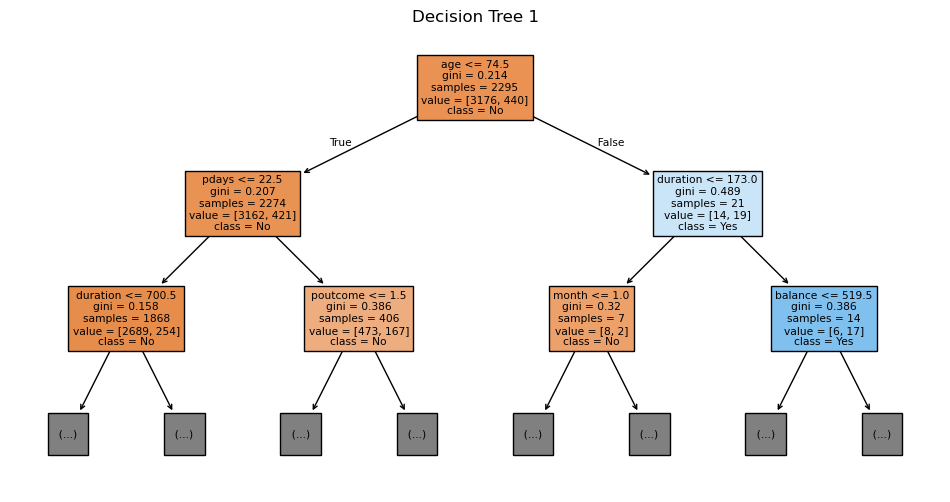

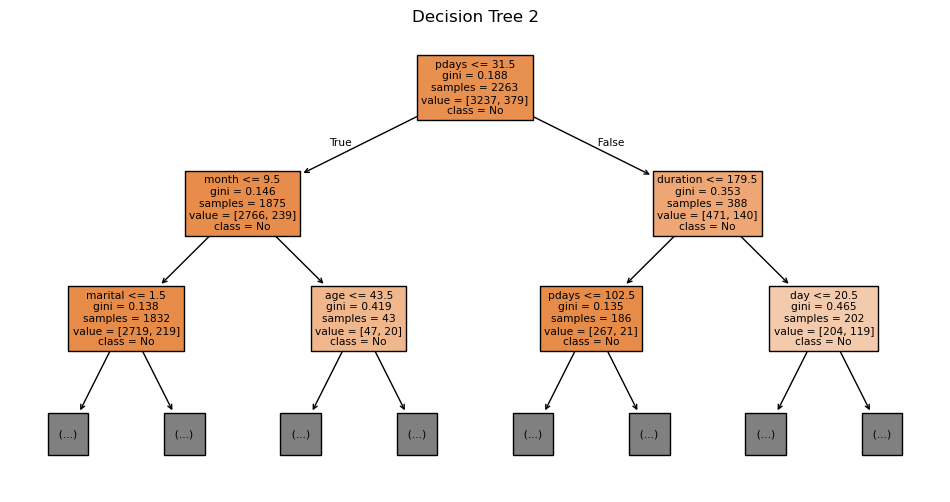

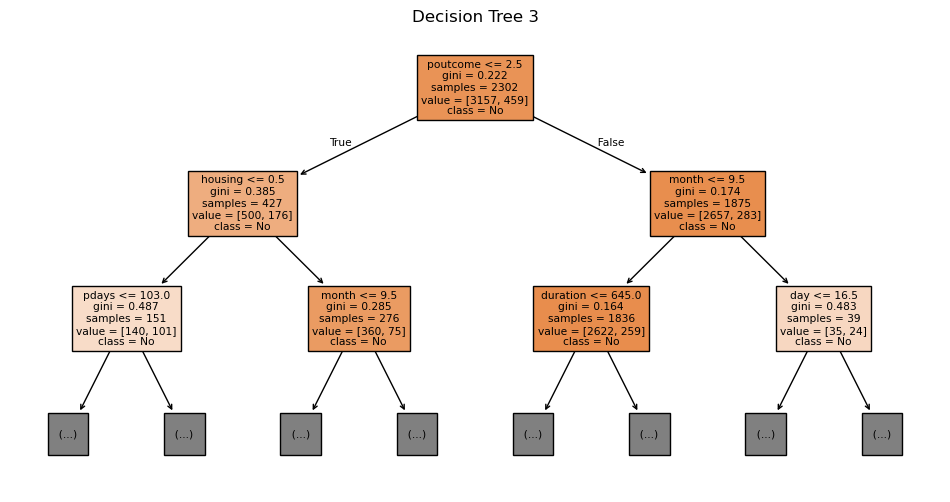

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the first 3 decision trees from the Random Forest
for i in range(3):
    plt.figure(figsize=(12, 6))
    plot_tree(rf.estimators_[i], 
              feature_names=X_train.columns, 
              class_names=['No', 'Yes'], 
              filled=True, 
              max_depth=2)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:
best_params = {'max_depth': 5, 'n_estimators': 260}
print(f"Best hyperparameters: {best_params}")